# Applying a decision tree for regression

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, PredictionErrorDisplay

## Reading data

In [40]:
DATA = pd.read_csv("FinalDataFrame.csv", index_col="Unnamed: 0")
DATA

,racePctAsian,blackPerCap,indianPerCap,PctEmplProfServ,PctKids2Par,PctWorkMomYoungKids,NumImmig,PctImmigRec10,PctPersOwnOccup,PctVacMore6Mos,OwnOccMedVal,RentLowQ,RentHighQ,MedOwnCostPctIncNoMtg,PctForeignBorn,PctSameCity85,PctUsePubTrans,ViolentCrimesPerPop
0,0.12,0.32,0.27,0.41,0.59,0.74,0.03,0.39,0.55,0.26,0.19,0.36,0.38,0.25,0.12,0.51,0.20,0.20
1,0.45,0.33,0.16,0.15,0.47,0.46,0.01,0.63,0.26,0.25,0.20,0.42,0.40,0.18,0.21,0.60,0.45,0.67
2,0.17,0.27,0.07,0.29,0.44,0.71,0.00,0.19,0.42,0.30,0.17,0.27,0.27,0.28,0.14,0.67,0.02,0.43
3,0.12,0.39,0.16,0.45,0.54,0.85,0.02,0.31,0.94,0.47,0.21,0.75,0.77,0.47,0.19,0.64,0.28,0.12
4,0.09,0.28,0.00,0.38,0.91,0.40,0.00,0.27,0.89,0.55,0.31,0.40,0.38,0.21,0.11,0.61,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.12,0.27,0.00,0.68,0.68,0.78,0.01,0.47,0.55,0.21,0.22,0.45,0.41,0.39,0.22,0.48,0.05,0.09
1990,0.83,0.26,0.18,0.41,0.63,0.32,0.05,0.67,0.12,0.13,0.37,0.54,0.61,0.31,0.53,0.10,0.20,0.45
1991,0.04,0.25,0.19,0.40,0.42,0.38,0.06,0.26,0.38,0.45,0.32,0.28,0.39,0.53,0.25,0.79,0.18,0.23
1992,0.22,0.29,0.20,0.57,0.65,0.57,0.06,0.49,0.39,0.34,0.49,0.58,0.75,0.40,0.45,0.59,0.33,0.19


## Creating test and train sets for model fitting

In [41]:
X = DATA.loc[:, DATA.columns[:-2]]
Y = DATA.loc[:, DATA.columns[-1]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
X_train.size, X_test.size

(25520, 6384)

## Defining the optimum Decision Tree Regressor
The optimization will be made by changing the number of samples per Split and Leaf and also the max number of levels for
the depth of the tree.

In [42]:
Results_Nums_SplitLeaf = []
MinR2 = 0.0
Range_Leaf_Split = range(1, 21)
Range_Depth = range(2, 11)

for numDepth in Range_Depth:
    for numSplit in Range_Leaf_Split:
        for numLeaf in Range_Leaf_Split:
            DT_Regressor = DecisionTreeRegressor(min_samples_split=numSplit, min_samples_leaf=numLeaf,
                                                max_depth=numDepth, random_state=42)
            DT_Regressor.fit(X_train, Y_train)
            Y_hat = DT_Regressor.predict(X_test)

            MS2_E = mean_squared_error(Y_test, Y_hat)
            MA_E = mean_absolute_error(Y_test, Y_hat)
            R2_Score = r2_score(Y_test, Y_hat)
                    
            if R2_Score > MinR2:
                MinR2 = R2_Score
                MinSampleSplit = numSplit
                MinSampleLeaf = numLeaf
                MinDepth = numDepth

print(f"{MinSampleLeaf=}")
print(f"{MinSampleSplit=}")
print(f"{MinDepth=}")
print(f"{MinR2=}")

MinSampleLeaf=20
MinSampleSplit=1
MinDepth=4
MinR2=0.6140434368620079


## Using optimal number of samples for leafs and splits

In [43]:
DT_Regressor = DecisionTreeRegressor(min_samples_split=MinSampleSplit, min_samples_leaf=MinSampleLeaf,
                                     max_depth = MinDepth, random_state=42)
DT_Regressor.fit(X_train, Y_train)
Y_hat = DT_Regressor.predict(X_test)

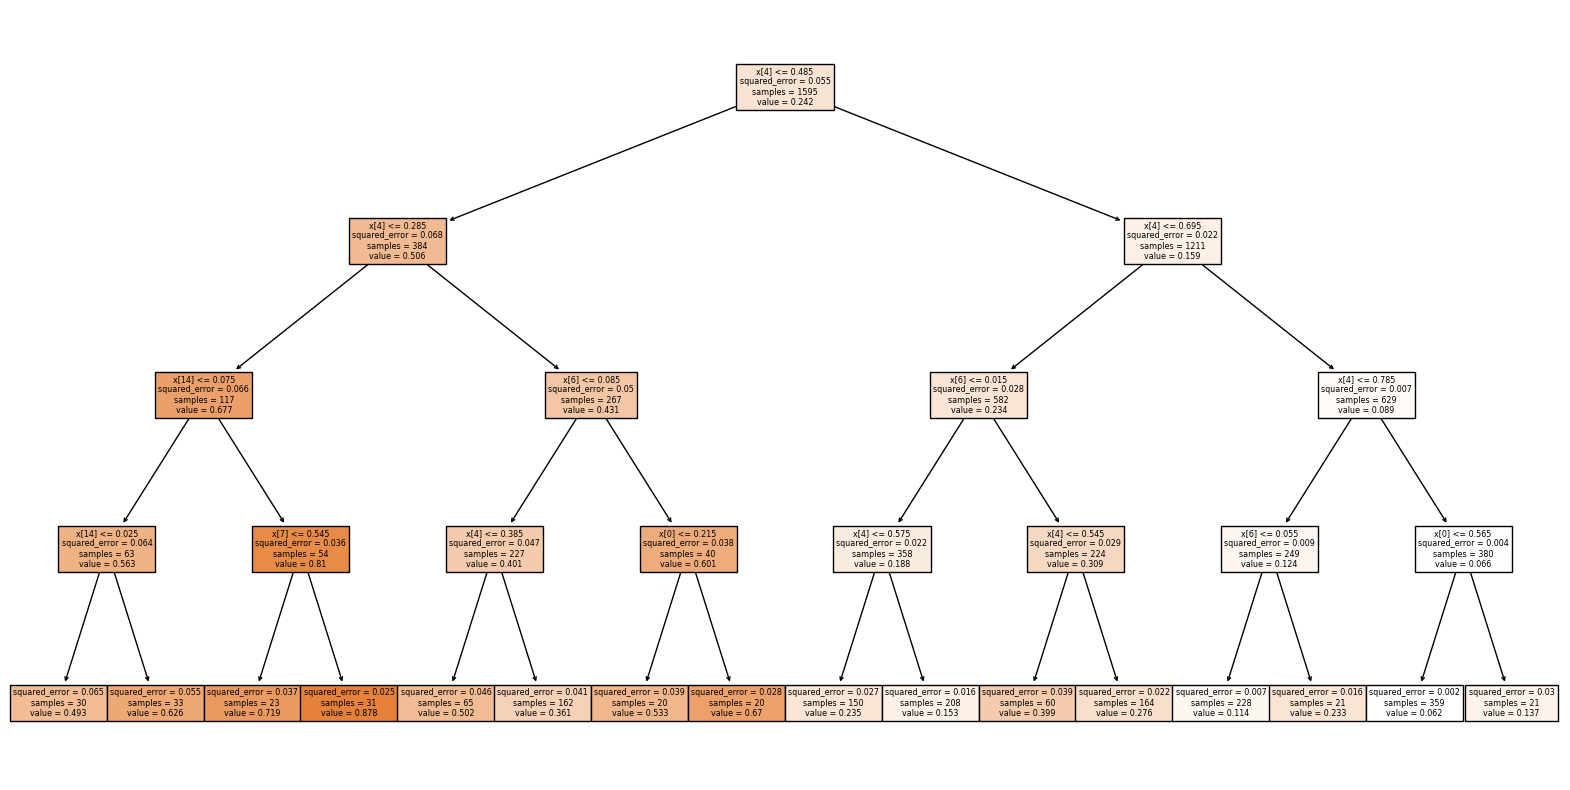

In [44]:
FiguraTree, SubPlot = plt.subplots(ncols=1, nrows=1, figsize=(20,10))

plot_tree(DT_Regressor, filled=True, ax=SubPlot)
plt.show()

In [45]:
Y_hat = DT_Regressor.predict(X_test)

## Obtaining scores for Decision Tree model

In [46]:
MS2_E = mean_squared_error(Y_test, Y_hat)
MA_E = mean_absolute_error(Y_test, Y_hat)
R2 = r2_score(Y_test, Y_hat)

print(f"{MS2_E=} ")
print(f"{MA_E=} ")
print(f"{R2=} ")

MS2_E=0.019017660362553278 
MA_E=0.10001935654998267 
R2=0.6140434368620079 


## Visualize Prediction-Error plot

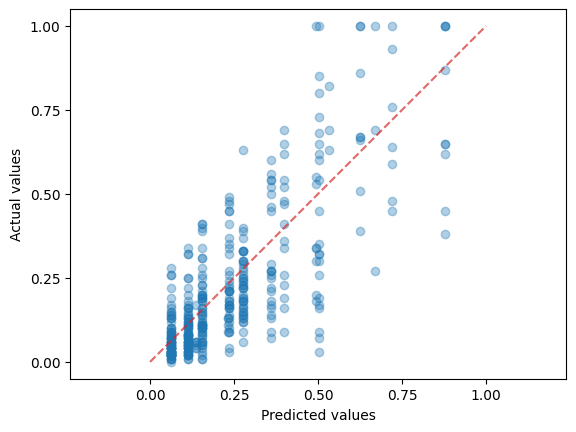

In [47]:
PredictionErrorDisplay.from_predictions(y_true=Y_test, y_pred=Y_hat, kind="actual_vs_predicted",
                       scatter_kwargs={"alpha":0.35, "color":"tab:blue"},
                       line_kwargs={"color":"tab:red"})